In [1]:
# Loading in inital packages that I know I'll need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading in the data
df = pd.read_csv('https://raw.githubusercontent.com/Cstan1987stat/mini-projects/refs/heads/main/bank_marketing/bank_cleaned.csv')
display(df.head())
display(df.info())

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


None

**Predictor Variables**
* age : Client's age in years. (Numerical)
* job : Client's occupation. (Categorical)
* marital : Client's marital status. (Categorical)
* education : Client's education level. (Categorical)
default : Whether the client has credit in default. (Categorical: yes or no)
* balance : Client's average yearly balance in euros. (Numerical)
* housing : Indicates if the client has a housing loan. (Categorical: yes or no)
* loan : Indicates whether the client has a personal loan. (Categorical: yes or no)
* campaign : Number of contact attempts made during the current campaign for this client (includes the current contact, and includes unanswered attempts). (Numerical)
* pdays : Number of days since the client was last contacted during a previous campaign, -1 indicates they were not previously contacted. (Numerical)
* previous : Number of contact attempts (successful or not) made in campaigns prior to the current one. (Numerical).
* poutcome : Outcome of the most recent previous marketing campaign. (Categorical)

These columns initially caused some confusion due to the wording, but they all refer to the current contact attempt:
* contact : Communication used to contact the client in the current campaign. The word “last” in the documentation refers to this most recent/current call, not a past one.  (Categorical)
* day : Day of the month when the current contact was made. (Numeric)
* month : Month of the year when the current contact was made. (Categorical)
* duration : Duration of the current call in seconds. This refers to the length of the conversation with the client during the contact attempt represented by this row. (Numerical)

**Target Variable**
* y : Whether the client subscribed to a term deposit. (Categorical: yes or no)


In [3]:
# Creating a feature to bin the pdays feature
def bin_pdays(v):
  if v == -1:
      return 'Not Contacted'
  elif v < 100:
      return '0-100 days'
  elif v < 200:
      return '101-200 days'
  else:
      return '201+ days'

# Creating a function to bin the day feature
def bin_day(v):
  if v < 10:
      return '0-10 days'
  elif v < 20:
      return '11-20 days'
  else:
      return '21-31 days'

# Applying the functions
df['pdays_bin'] = df['pdays'].apply(bin_pdays)
df['day_bin'] = df['day'].apply(bin_day)

# Drop original columns
del df['pdays']
del df['day']

In [4]:
# Splitting up into train and test
rows = df.shape[0]
train_len = round(rows * 0.70)
train = df.iloc[:train_len]
test = df.iloc[train_len:]

# EDA

## Numerical Summary Statistics

In [5]:
# Creating list of numeric columns
num_cols = ['age', 'balance', 'campaign', 'previous', 'duration']
# Calculating the summary statistics
train[num_cols].describe().round(2)

,age,balance,campaign,previous,duration
count,31648.00,31648.00,31648.00,31648.00,31648.00
mean,41.11,1293.39,3.06,0.21,252.40
std,9.60,2961.23,3.51,1.95,262.35
min,19.00,-8019.00,1.00,0.00,0.00
25%,33.00,47.00,1.00,0.00,98.00
50%,40.00,397.00,2.00,0.00,171.00
75%,49.00,1328.00,3.00,0.00,305.00
max,94.00,98417.00,63.00,275.00,4918.00


## Numerical Histograms

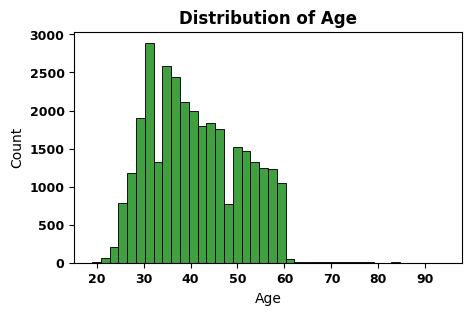

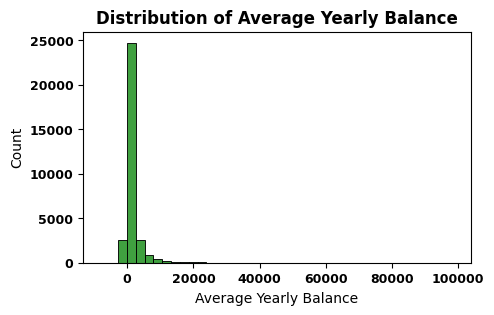

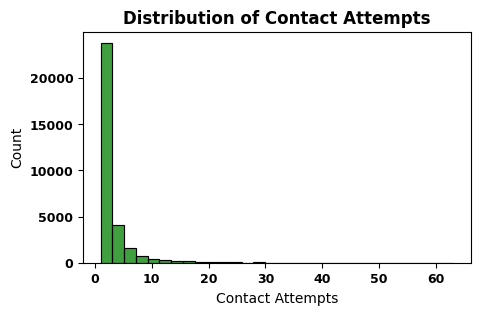

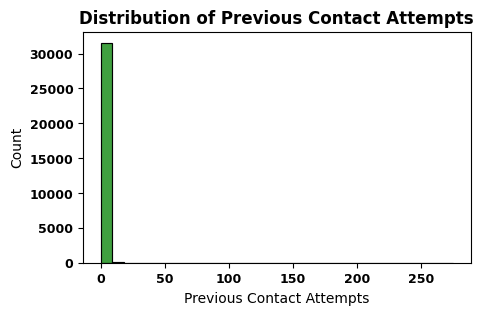

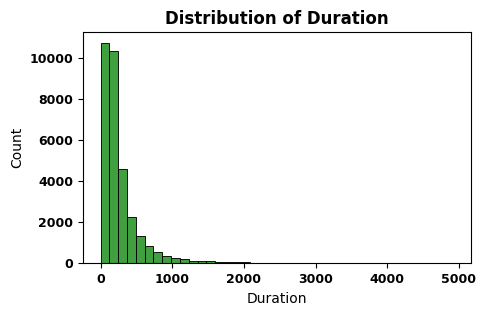

In [6]:
# Creating histograms for each of the numeric variables

plt.figure(figsize=(5, 3))
sns.histplot(train['age'], bins=40, color = 'green')
plt.title('Distribution of Age', fontsize=12, weight='bold')
plt.xlabel('Age', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks(fontsize=9, weight='bold')
plt.yticks(fontsize=9, weight='bold')
plt.show()

plt.figure(figsize=(5, 3))
sns.histplot(train['balance'], bins=40, color = 'green')
plt.title('Distribution of Average Yearly Balance', fontsize=12, weight='bold')
plt.xlabel('Average Yearly Balance', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks(fontsize=9, weight='bold')
plt.yticks(fontsize=9, weight='bold')
plt.show()

plt.figure(figsize=(5, 3))
sns.histplot(train['campaign'], bins=30, color = 'green')
plt.title('Distribution of Contact Attempts', fontsize=12, weight='bold')
plt.xlabel('Contact Attempts', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks(fontsize=9, weight='bold')
plt.yticks(fontsize=9, weight='bold')
plt.show()

plt.figure(figsize=(5, 3))
sns.histplot(train['previous'], bins=30, color = 'green')
plt.title('Distribution of Previous Contact Attempts', fontsize=12, weight='bold')
plt.xlabel('Previous Contact Attempts', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks(fontsize=9, weight='bold')
plt.yticks(fontsize=9, weight='bold')
plt.show()

plt.figure(figsize=(5, 3))
sns.histplot(train['duration'], bins=40, color = 'green')
plt.title('Distribution of Duration', fontsize=12, weight='bold')
plt.xlabel('Duration', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks(fontsize=9, weight='bold')
plt.yticks(fontsize=9, weight='bold')
plt.show()

## Categorical Proportion Plots

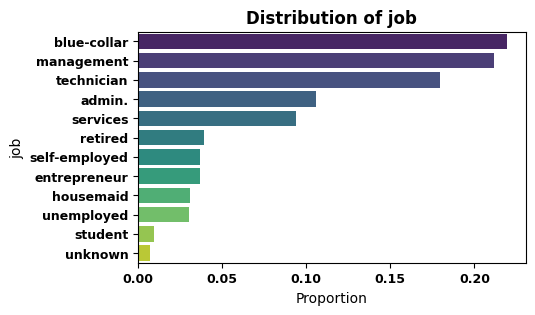

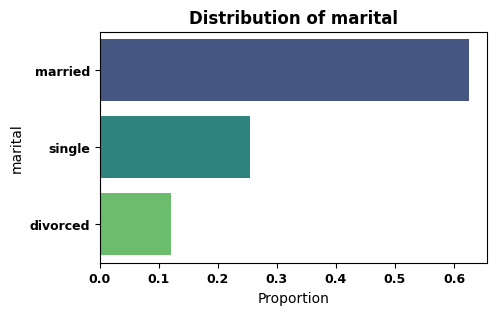

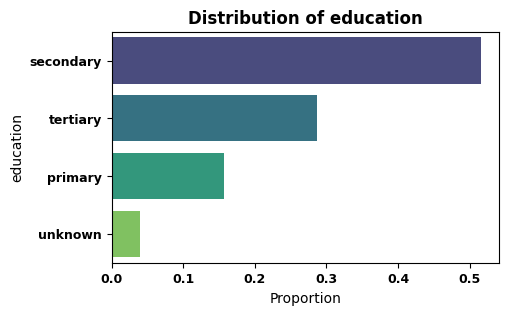

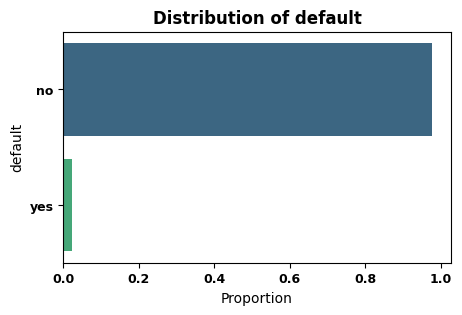

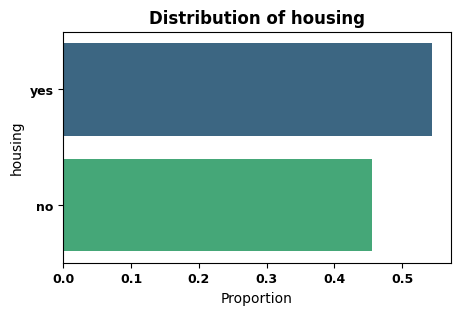

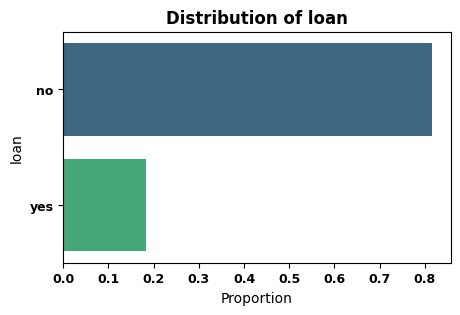

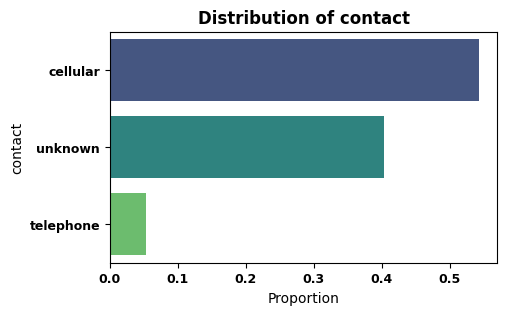

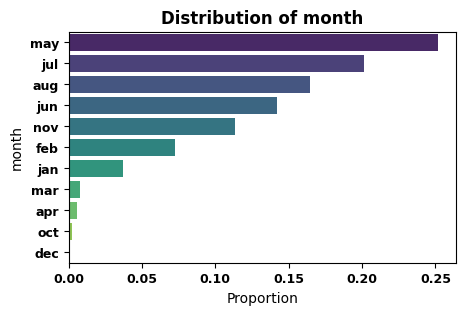

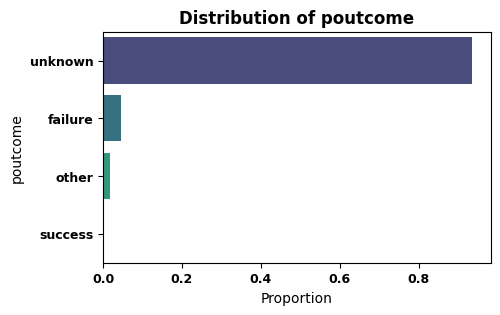

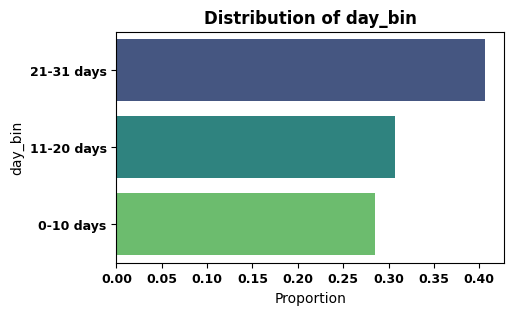

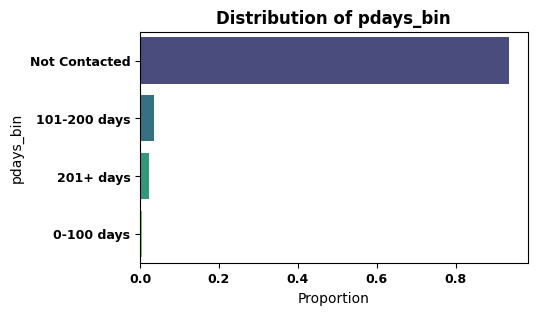

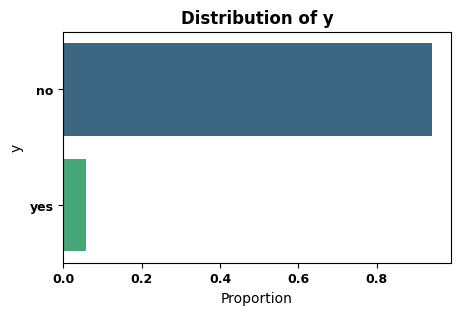

In [7]:
# Creating a list of all the categorical column names
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'day_bin', 'pdays_bin', 'y']

# Looping through all categorical columns
for i in cat_cols:

    # Calculting the proportions for each category in each feature
    prop_df = train[i].value_counts(normalize=True).rename('proportion').reset_index()
    prop_df.columns = [i, 'proportion']

    # Plotting a barplot
    plt.figure(figsize=(5, 3))
    sns.barplot(x='proportion', y=i, data=prop_df, palette='viridis', hue=i)
    plt.title(f'Distribution of {i}', fontsize=12, weight='bold')
    plt.xlabel('Proportion')
    plt.xticks(fontsize=9, weight='bold')
    plt.yticks(fontsize=9, weight='bold')
    plt.ylabel(i)
    plt.show()
    print()

## Scatterplots

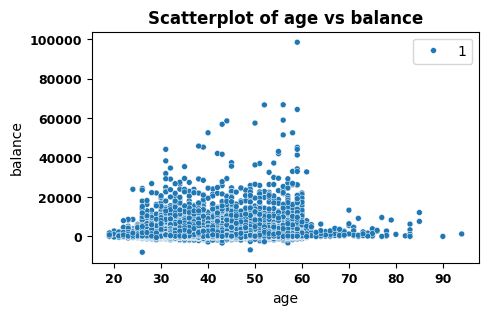

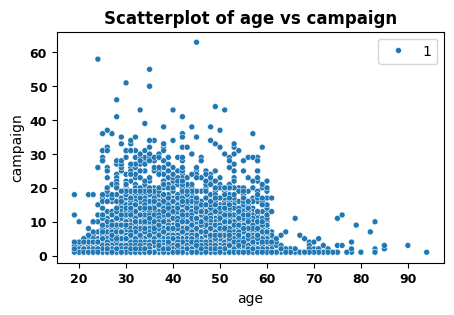

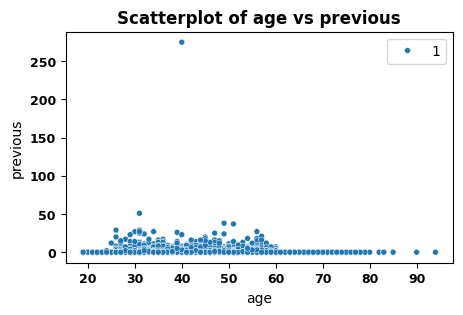

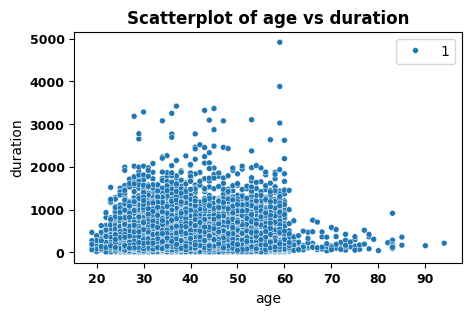

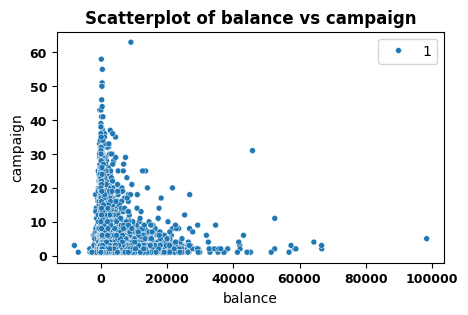

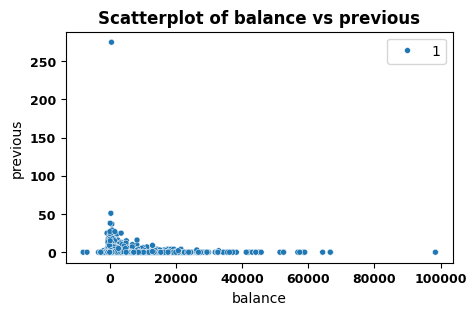

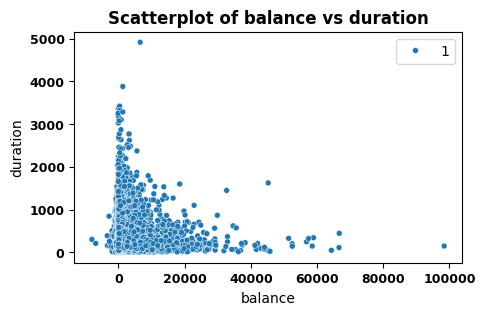

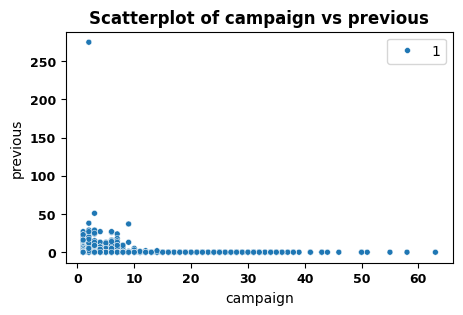

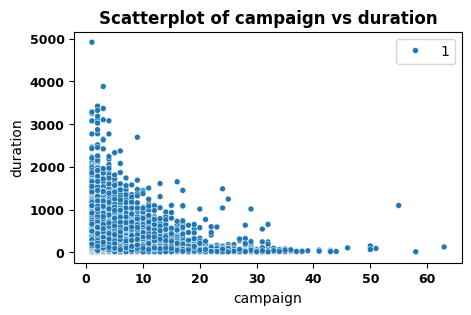

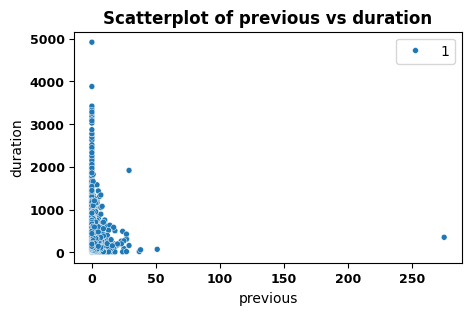

In [8]:
# Importing in the combinations function from itertools
from itertools import combinations

# Finding all 2-way combinations in the num_col list
for i, j in combinations(num_cols, 2):

    # Plotting i vs j
    plt.figure(figsize=(5, 3))
    sns.scatterplot(x=i, y=j, data=train, size=1)
    plt.title(f'Scatterplot of {i} vs {j}', fontsize=12, weight='bold')
    plt.xlabel(i, fontsize=10)
    plt.ylabel(j, fontsize=10)
    plt.xticks(fontsize=9, weight='bold')
    plt.yticks(fontsize=9, weight='bold')
    plt.show()

# Feature Selection and Engineering

## Feature Selection

In [9]:
# Creating function to remove all the obvious outliers from the balance and previous columns
def b_p_outlier_removal(df):
  data = df.copy()
  data = data[data['balance'] < 80000]
  data = data[data['previous'] < 250]
  return data

In [10]:
# Sending the train and test dataset to the outlier removal function

train = b_p_outlier_removal(train)
test = b_p_outlier_removal(test)

In [11]:
# Creating function to create a dataframe and series : dataframe for all the predictors and series for the target variable
def pred_tar_sep(df, target):
  X = df.drop(target, axis=1)
  # Both campaign and duration most likely won't be unknown
  X = X.drop('duration', axis=1)
  X = X.drop('campaign', axis=1)
  y = df[target]
  return X, y

# Splitting up both the train and test datasets
train_X, train_y = pred_tar_sep(train, 'y')
test_X, test_y = pred_tar_sep(test, 'y')

In [12]:
# Importing the LabelEncoder and mutual_info_classif functions
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif

In [13]:
# Creating new list of categorical variable names
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'day_bin', 'pdays_bin']

# Creating copy of train_X
train_X_copy = train_X.copy()

# Converting all categorical columns to numbers using the LabelEncoder
for col in cat_cols:
  le = LabelEncoder()
  train_X_copy[col] = le.fit_transform(train_X_copy[col])

In [14]:
# Creating list of True's and False's to indicate what feature is categorical
disc = [False, True, True, True, True, False, True,
        True, True, True, False, True, True,
        True]

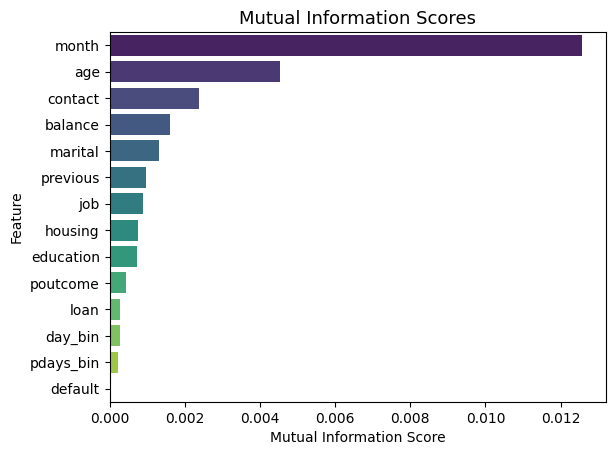

In [15]:
# Creating data frame to hold the mutual info for each feature
mi_df = pd.DataFrame()

# Adding feature names
mi_df['feature'] = train_X_copy.columns

# Finding the mutual_info scores for each feature
mi_df['mutual_info'] = mutual_info_classif(train_X_copy, train_y, discrete_features=disc, random_state=22)

# Sorting mi_df by mutual_info
mi_df = mi_df.sort_values(by='mutual_info', ascending=False)

# Create barplot of mutual information scores for each feature.
sns.barplot(x='mutual_info', y='feature', data=mi_df, palette='viridis', hue='feature')
plt.title('Mutual Information Scores', fontsize=13)
plt.xlabel('Mutual Information Score', fontsize=10)
plt.ylabel('Feature', fontsize=10)
plt.show()

In [16]:
# Finding what features have mutual information score above the median
med = mi_df['mutual_info'].median()
mi_df[mi_df['mutual_info'] > med]

,feature,mutual_info
9,month,0.012568
0,age,0.004530
8,contact,0.002393
5,balance,0.001616
2,marital,0.001314
10,previous,0.000972
1,job,0.000884


In [17]:
# Creating function to keep only the features with mutual information score greater than the median
def feat_select(df):
  data = df.copy()
  data = data[['month', 'age', 'contact', 'balance', 'marital', 'previous', 'job']]
  return data

# Sending both train_X and test_X to the feat_select function
train_X = feat_select(train_X)
test_X = feat_select(test_X)

## Outliers and Feature Engineering

In [18]:
# Creating function to determine what percentage of a feature is made of outliers
def outlier_check(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    row = df.shape[0]
    outliers = sum(df[col] < lower_bound) + sum(df[col] > upper_bound)
    per_outliers = round(outliers / row * 100,2)
    return per_outliers

In [19]:
# Sending all numeric columns to the outlier_check function
display(outlier_check(train, 'balance'))
display(outlier_check(train, 'previous'))
display(outlier_check(train, 'age'))

10.87

6.5

0.09

In [20]:
# Creating function to create binary variable indicating the numerical value is an outliers
def create_outlier_flag(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return df[col].apply(lambda x: 1 if x < lower or x > upper else 0)

# Creating outlier flag columns for the balance and previous features for train_X
train_X['out_balance'] = create_outlier_flag(train_X, 'balance')
train_X['out_previous'] = create_outlier_flag(train_X, 'previous')

# Creating outlier flag columns for the balance and previous feature for train_X
test_X['out_balance'] = create_outlier_flag(test_X, 'balance')
test_X['out_previous'] = create_outlier_flag(test_X, 'previous')

In [21]:
# Creating function to creat interactions terms
def interact(df):
  df = df.copy()
  df['age_balance'] = df['age'] * df['balance']
  df['age_previous'] = df['age'] * df['previous']
  df['balance_previous'] = df['balance'] * df['previous']
  return df

# Sending train_X and test_X to the interact function
train_X = interact(train_X)
test_X = interact(test_X)

# Model Building and Evaluation

## Base Model

In [22]:
# Importing in RandomForestClassifier, TimeSeriesSplit, and f1_score functions.
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import f1_score

In [23]:
# Creating custom tester function
# X is the predictor variables
# y is the target variable
# estimator is the pipeline to be fitted and test
# splits is how many splits we want for TimeSeriesSplit

def tester(X, y, estimator, splits):

  tscv = TimeSeriesSplit(n_splits = splits)
  # Creating empty list to hold f1-scores
  f1_list = []

  # Creating initial count for progress checker
  count = 1

  # Spltting up the data using tscv
  for train_index, test_index in tscv.split(X):

      # Getting the training and testing datasets based on the indexes from tscv
      X_training, X_testing = X.iloc[train_index], X.iloc[test_index]
      # Getting the training and testing series based on the index from tscv
      y_training, y_testing = y.iloc[train_index], y.iloc[test_index]

      # Fitting the estimator
      estimator.fit(X_training, y_training)
      # Predicting values for X_testing
      pred = estimator.predict(X_testing)
      # Adding f1_score to f1_list
      f1_list.append(round(f1_score(pred, y_testing, pos_label='yes'), 3))

      # Progress check
      print(f'{count} iterations are done.')
      # Adding 1 to whatever the count value currently is
      count += 1

  # Creating empty dataframe to hold f1_list
  scoring_metrics = pd.DataFrame()
  scoring_metrics['f1_score'] = f1_list
  print()

  # Calculating the mean f1-score and standard deviation f1-score
  for i in scoring_metrics.columns:
      avg = round(scoring_metrics[i].mean(), 3)
      std = round(scoring_metrics[i].std(), 3)
      print(f'Mean f1_score was {avg}')
      print(f'Standard deviation f1_score was {std}')
      print()

In [25]:
# Creating list of columns
num_cols = ['age', 'balance', 'previous', 'age_balance', 'age_previous', 'balance_previous']
pass_cols = ['out_balance', 'out_previous']
cat_cols = ['month', 'contact', 'marital', 'job']

# Importing OneHotEncoder, StandardScaler, Pipeline, and ColumnTransformer functions
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Creating pipeline to scale all continuous variables.
continuous_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ])


# Creating pipeline to one-hot encode all categorical variables
cat_pipeline = Pipeline([
    ('one_hot', OneHotEncoder(sparse_output=False, handle_unknown='ignore')),
])

# Creating a column transform to send all continuous to the continuous_pipeline, passthrough all the pass columns, and all categorical variables to the cat_pipeline.
column_transformer = ColumnTransformer([
    ('continuous', continuous_pipeline, num_cols),
    ('don\'t change', 'passthrough', pass_cols),
    ('categorical', cat_pipeline, cat_cols),
])

# Setting preprocessor to be the column_transofmer
preprocessor = column_transformer

# Creating a base_pipeline where the first step is preprocessing and second step is a RandomForestClassifier
base_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('rf', RandomForestClassifier(random_state=22)),
])

# Sending our training data, base_pipeline, 5 to the tester function
# - 5 indicates we want 5 testing folds
tester(train_X, train_y, base_pipeline, 5)

# Visualizes the base_pipeline
display(base_pipeline)

1 iterations are done.
2 iterations are done.
3 iterations are done.
4 iterations are done.
5 iterations are done.

Mean f1_score was 0.006
Standard deviation f1_score was 0.006



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('continuous',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'balance', 'previous',
                                                   'age_balance',
                                                   'age_previous',
                                                   'balance_previous']),
                                                 ("don't change", 'passthrough',
                                                  ['out_balance',
                                                   'out_previous']),
                                                 ('categorical',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['month', 'contact',
                                                   'marital', 'job'])])),
                ('rf', RandomForestClassifier(random_state=22))])

In [26]:
base_pipeline_class_weight = Pipeline([
    ('preprocessor', preprocessor),
    ('rf', RandomForestClassifier(random_state=22, class_weight='balanced')),
])

tester(train_X, train_y, base_pipeline_class_weight, 5)

1 iterations are done.
2 iterations are done.
3 iterations are done.
4 iterations are done.
5 iterations are done.

Mean f1_score was 0.009
Standard deviation f1_score was 0.008



In [27]:
pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 2.7 MB/s eta 0:00:00


In [32]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import make_scorer

pipeline_with_smote = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=22)),
    ('rf', RandomForestClassifier(random_state=22)),
])

search_space = {
    'smote__sampling_strategy': Real(0.1, 0.9),
    'rf__n_estimators': Integer(10, 400),
    'rf__max_depth': Integer(5, 20),
    'rf__min_samples_split': Integer(2, 20),
    'rf__max_features': Real(0.1, 0.9)
}

# --- Modified tester function for Nested Cross-Validation ---
# The 'estimator' now refers to the ImbPipeline
# 'splits' refers to the outer_cv splits
# inner_splits is added for the inner_cv for tuning
def tester_full(X, y, pipeline_estimator, outer_splits): # Renamed estimator to pipeline_estimator for clarity
    outer_tscv = TimeSeriesSplit(n_splits=outer_splits)
    f1_list = []
    best_params_list = [] # To store best params found in each fold

    count = 1

    # Outer Cross-Validation Loop (Evaluation Loop)
    for train_index, test_index in outer_tscv.split(X):
        print(f'--- Outer Fold {count} ---')
        X_outer_train, X_outer_test = X.iloc[train_index], X.iloc[test_index]
        y_outer_train, y_outer_test = y.iloc[train_index], y.iloc[test_index]

        # Inner Cross-Validation Loop (Tuning Loop)
        # Use make_scorer to ensure f1_score is used for tuning
        scorer = make_scorer(f1_score, pos_label='yes')
        inner_tscv = TimeSeriesSplit(n_splits=4) # Inner CV splitter

        opt = BayesSearchCV(
            estimator=pipeline_estimator, # The ImbPipeline is passed here
            search_spaces=search_space,
            n_iter=30, # Number of parameter settings sampled (adjust as needed)
            scoring=scorer,
            cv=inner_tscv, # Use the inner TimeSeriesSplit for tuning
            verbose=0, # Set to 1 or 2 for more detailed output during tuning
            random_state=22
        )

        # Fit RandomizedSearchCV on the outer training fold
        # This will run the inner CV and find the best parameters for this fold
        opt.fit(X_outer_train, y_outer_train)

        # Get the best estimator (pipeline with best params) found for this fold
        best_estimator_for_fold = opt.best_estimator_

        # Make predictions on the outer test set using the best estimator for this fold
        pred = best_estimator_for_fold.predict(X_outer_test)

        # Calculate F1-score for this outer fold and add to list
        fold_f1 = round(f1_score(pred, y_outer_test, pos_label='yes'), 3)
        f1_list.append(fold_f1)
        best_params_list.append(opt.best_params_)

        print(f'Outer Fold {count} F1-score: {fold_f1}')
        print(f'Best parameters for Outer Fold {count}: {opt.best_params_}\n')
        count += 1

    # Calculate and print mean and standard deviation of outer f1-scores
    mean_f1 = np.mean(f1_list)
    std_f1 = np.std(f1_list)

    print(f'--- Nested Cross-Validation Results ---')
    print(f'Mean F1-score across all outer folds: {mean_f1:.3f}')
    print(f'Standard deviation of F1-scores: {std_f1:.3f}')
    print('\nBest parameters found in each fold:')
    for i, params in enumerate(best_params_list):
        print(f'Fold {i+1}: {params}')

base_pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=22)), # Added SMOTE step here
    ('rf', RandomForestClassifier(random_state=22)),
])

# --- Call the modified tester function ---

tester_full(train_X, train_y, base_pipeline, outer_splits=5)

--- Outer Fold 1 ---
Outer Fold 1 F1-score: 0.071
Best parameters for Outer Fold 1: OrderedDict([('rf__max_depth', 19), ('rf__max_features', 0.1070836517801121), ('rf__min_samples_split', 9), ('rf__n_estimators', 89), ('smote__sampling_strategy', 0.296774027193227)])

--- Outer Fold 2 ---
Outer Fold 2 F1-score: 0.133
Best parameters for Outer Fold 2: OrderedDict([('rf__max_depth', 5), ('rf__max_features', 0.5950697983673887), ('rf__min_samples_split', 20), ('rf__n_estimators', 400), ('smote__sampling_strategy', 0.9)])

--- Outer Fold 3 ---
Outer Fold 3 F1-score: 0.118
Best parameters for Outer Fold 3: OrderedDict([('rf__max_depth', 5), ('rf__max_features', 0.9), ('rf__min_samples_split', 7), ('rf__n_estimators', 238), ('smote__sampling_strategy', 0.9)])

--- Outer Fold 4 ---
Outer Fold 4 F1-score: 0.087
Best parameters for Outer Fold 4: OrderedDict([('rf__max_depth', 6), ('rf__max_features', 0.9), ('rf__min_samples_split', 20), ('rf__n_estimators', 205), ('smote__sampling_strategy', 0.

In [61]:
final_pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=22, sampling_strategy=0.77)),
    ('rf', RandomForestClassifier(max_depth=8, max_features = 0.52, min_samples_split = 15, n_estimators=266))

])

tester(train_X, train_y, final_pipeline, 5)
final_pipeline

1 iterations are done.
2 iterations are done.
3 iterations are done.
4 iterations are done.
5 iterations are done.

Mean f1_score was 0.125
Standard deviation f1_score was 0.049



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('continuous',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'balance', 'previous',
                                                   'age_balance',
                                                   'age_previous',
                                                   'balance_previous']),
                                                 ("don't change", 'passthrough',
                                                  ['out_balance',
                                                   'out_previous']),
                                                 ('categorical',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['month', 'contact',
                                                   'marital', 'job'])])),
                ('smote', SMOTE(random_state=22, sampling_strategy=0.77)),
                ('rf',
                 RandomForestClassifier(max_depth=8, max_features=0.52,
                                        min_samples_split=15,
                                        n_estimators=266))])

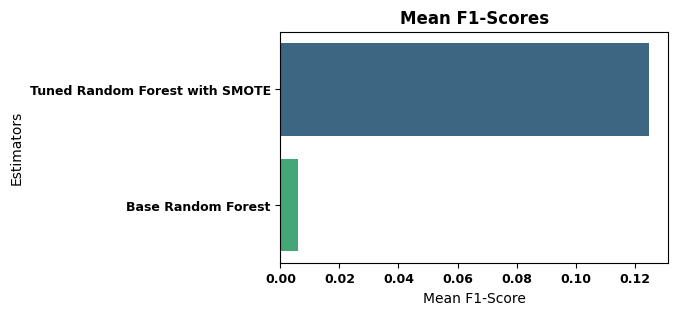

Percent increase in F1-score: 1983.33 %


In [64]:
scoring_df = pd.DataFrame({'Estimators': ['Tuned Random Forest with SMOTE', 'Base Random Forest'], 'Mean F1-Score': [.125, 0.006]})

plt.figure(figsize=(5, 3))
sns.barplot(x='Mean F1-Score', y='Estimators', data=scoring_df, palette='viridis', hue='Estimators')
plt.title('Mean F1-Scores', fontsize=12, weight='bold')
plt.xlabel('Mean F1-Score', fontsize=10)
plt.ylabel('Estimators', fontsize=10)
plt.xticks(fontsize=9, weight='bold')
plt.yticks(fontsize=9, weight='bold')
plt.show()

percent_increase = (.125 - 0.006) / .006 * 100
print('Percent increase in F1-score:', round(percent_increase, 2), '%')

In [65]:
final_pipeline.fit(train_X, train_y)

pred = final_pipeline.predict(test_X)
f1_score(pred, test_y, pos_label='yes')

0.28516579406631765

In [73]:
pred_prob = pd.DataFrame({'Predicted Probability': final_pipeline.predict_proba(test_X)[:, 1],
                          'Did they Subscribe': test_y.values})

pred_prob

total_sub = len(pred_prob[pred_prob['Did they Subscribe'] == 'yes'])

for p in [0.01, 0.05, 0.1]:

  rows = int(len(pred_prob) * p)

  sorted_sub_pred_prob = pred_prob.sort_values(by='Predicted Probability', ascending=False).head(rows)

  subscribe = len(sorted_sub_pred_prob[sorted_sub_pred_prob['Did they Subscribe'] == 'yes'])

  perc_gotten = subscribe / total_sub * 100

  print(f'By selecting the top {p * 100}% of clients most likely to subscribe, we succesfully found {perc_gotten:.2f}% of all people who would subscribe.')


By selecting the top 1.0% of clients most likely to subscribe, we succesfully found 1.77% of all people who would subscribe.
By selecting the top 5.0% of clients most likely to subscribe, we succesfully found 9.20% of all people who would subscribe.
By selecting the top 10.0% of clients most likely to subscribe, we succesfully found 16.42% of all people who would subscribe.
